In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [C:\Users\islam\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


In [8]:
navegador.get(r"https://www.hashtagtreinamentos.com/")

In [20]:
from selenium.webdriver.common.by import By

campo_nome = navegador.find_element(By.ID, 'firstname')  #para encontrar o ID, clica em inspecionar e procura o 
            # ID do local que você necessita

campo_nome.send_keys("Islam dex boladãO")   #send_keys serve para escrever dentro do campo em questão

# não é necessário sempre criar uma varíavel para escrever, podemos fazer tudo jutno

navegador.find_element(By.XPATH, '/html/body/div[1]/footer/div/div/div[1]/div[3]/div/form/div[2]/input').send_keys('islam.igor@boladao.com')
    #XPATH é encontrado ao selecionar o item inspecionado, e com o botão direito copiar o XPATH
    # no codigo em questão, há 2 campos com nome, email e o find_element não estava buscando o correto
    # o propblema foi corrigido após copiar o FULL XPATH


navegador.find_element(By.CLASS_NAME, 'botao-formulario').click() 
    # nao havia ID , entao utilizou se o by.Class_name.   #click é para clicar no local.
   

### ANTEÇÃO !! Quando for procurar um elemento, priorizar ID > Class_name > XPATH

Apesar do XPATH ser o que vai apresentar VALOR UNICO, ele é o mais fácil de ser mudado, por exemplo, caso o site mude a posição do elemento, o XPATH vai ser alterado e seu código poderá nao funcionar.

o ID geralmente é mantido , e tende a ser único, porém, nem sempre ele é utilizado apenas uma vez.

o Class é mais fácil de ser repetido, por isso que é menos recomendável


# OUTROS MÉTODOS DE SELEÇÃO

#### Selecionar pela tag

- Vamos selecionar o título

In [23]:
from selenium.webdriver.common.by import By


titulo = navegador.find_element(By.TAG_NAME, 'h1').text   # .text pega o texto dentro de uma tag
print(titulo)

Torne-se uma referência no Mercado de Trabalho com a Hashtag Treinamentos


#### Selecionar pelo Partial Link Text (ou LINK_TEXT)
- Quero conseguir pegar o número de whatsapp de contato

In [26]:
numero_whatsapp = navegador.find_element(By.PARTIAL_LINK_TEXT, 'WhatsApp').text   
 # vai procurar em todo o site se tem algum link com o texto WhatsApp
print(numero_whatsapp)

(21) 99865-8852 (WhatsApp)


#### Selecionar pelo name
- Preencher o formulário

In [30]:
navegador.find_element(By.NAME, 'firstname').send_keys('meu nome fica aqui')

#### Selecionar pelo CSS Selector
- Parecido com o XPATH, acaba não usando tanto, mas caso queira, tem uma referência aqui:
https://saucelabs.com/resources/articles/selenium-tips-css-selectors


não é muito usual, tem como fazer a seleção por todos os outros métodos já citados e de forma mais simples

#  MÉTODOS DE SELEÇÃO DE VÁRIOS ELEMENTOS


#### Selecionar vários elementos de uma vez

- Vamos selecionar pelo find_elements
- Vamos clicar no item Blog do menu

In [33]:
navegador.find_element(By.CLASS_NAME, 'nav-link').click()  
    # a intenção era clicar na aba BLOG, porém, ele clicou em Curso Excel Online.
    # isso acontece por esse class_name ser utilizado em mais de um elemento, e o find_element vai retornar o 
    # primeiro elemento que encontrar
    
    

In [ ]:
lista_elementos = navegador.find_elements(By.CLASS_NAME, 'nav-link')
print(len(lista_elementos)) #exibe o tamanho da lista de elementos que contem nav-link
print(lista_elementos) # mostra a lista com todos os elementos

# nota-se que fica complicado identificar qual o Elemento que você quer apenas analisando a lista

In [43]:
lista_elementos[5].click() # clica no item de índice 5 da lista do class. nesse caso BLOG

In [46]:
# uma opção que fará o código funcionar com mais eficiencia seria

lista_elementos = navegador.find_elements(By.CLASS_NAME, 'nav-link')
for elemento in lista_elementos:
    if 'blog' in elemento.text.lower():    # lower para garantir a igualdade da palavra, pois poderia ta escrito
        elemento.click()                       # com alguma letra maiúscula 
        break     
        #tem que dar o break, pois quando mudar de página, os elementos irão mudar 

#  MÉTODOS DE SELEÇÃO PARA PEGAR INFORMAÇÕES DE UM ELEMENTO

Diferente de Textos (.text)

#### Ex1: Link do WhatsApp

In [50]:
texto = navegador.find_element(By.XPATH, '/html/body/div/footer/div/div/div[1]/div[2]/div[5]/div[2]/a').text
print(texto)

atributo = navegador.find_element(By.XPATH, '/html/body/div/footer/div/div/div[1]/div[2]/div[5]/div[2]/a').get_attribute('href')
print(atributo)


(21) 99865-8852 (WhatsApp)
https://api.whatsapp.com/send?phone=5521998658852&text=Ol%C3%A1%2C%20gostaria%20de%20tirar%20uma%20d%C3%BAvida%20%20sobre%20o%20curso%20online


#### Ex2: Imagens dos Cursos

In [54]:
link_imagem = navegador.find_element(By.XPATH, '/html/body/div/div[6]/div/div/div[2]/div[1]/div[2]/div[1]/a/img').get_attribute('src')
print(link_imagem)

link_imagem_direciona = navegador.find_element(By.XPATH, '/html/body/div/div[6]/div/div/div[2]/div[1]/div[2]/div[1]/a').get_attribute('href')
# o XPATH é diferente, pois o link que vai ser direcionado ao clicar na imagem está no elemento acima da imagem, no href
print(link_imagem_direciona)

https://www.hashtagtreinamentos.com/wp-content/uploads/2022/06/Funcao-TEXTODIVISAO-no-Excel-1024x576.jpg
https://www.hashtagtreinamentos.com/funcao-textodivisao-no-excel


#### Ex3: Pegar todos os Links que as imagens levam


In [58]:
lista_elementos2 = navegador.find_elements(By.CLASS_NAME, 'foto-post-blog')
print(len(lista_elementos2)) 

# aparentemente são as 4 imagens que quero analisar

4


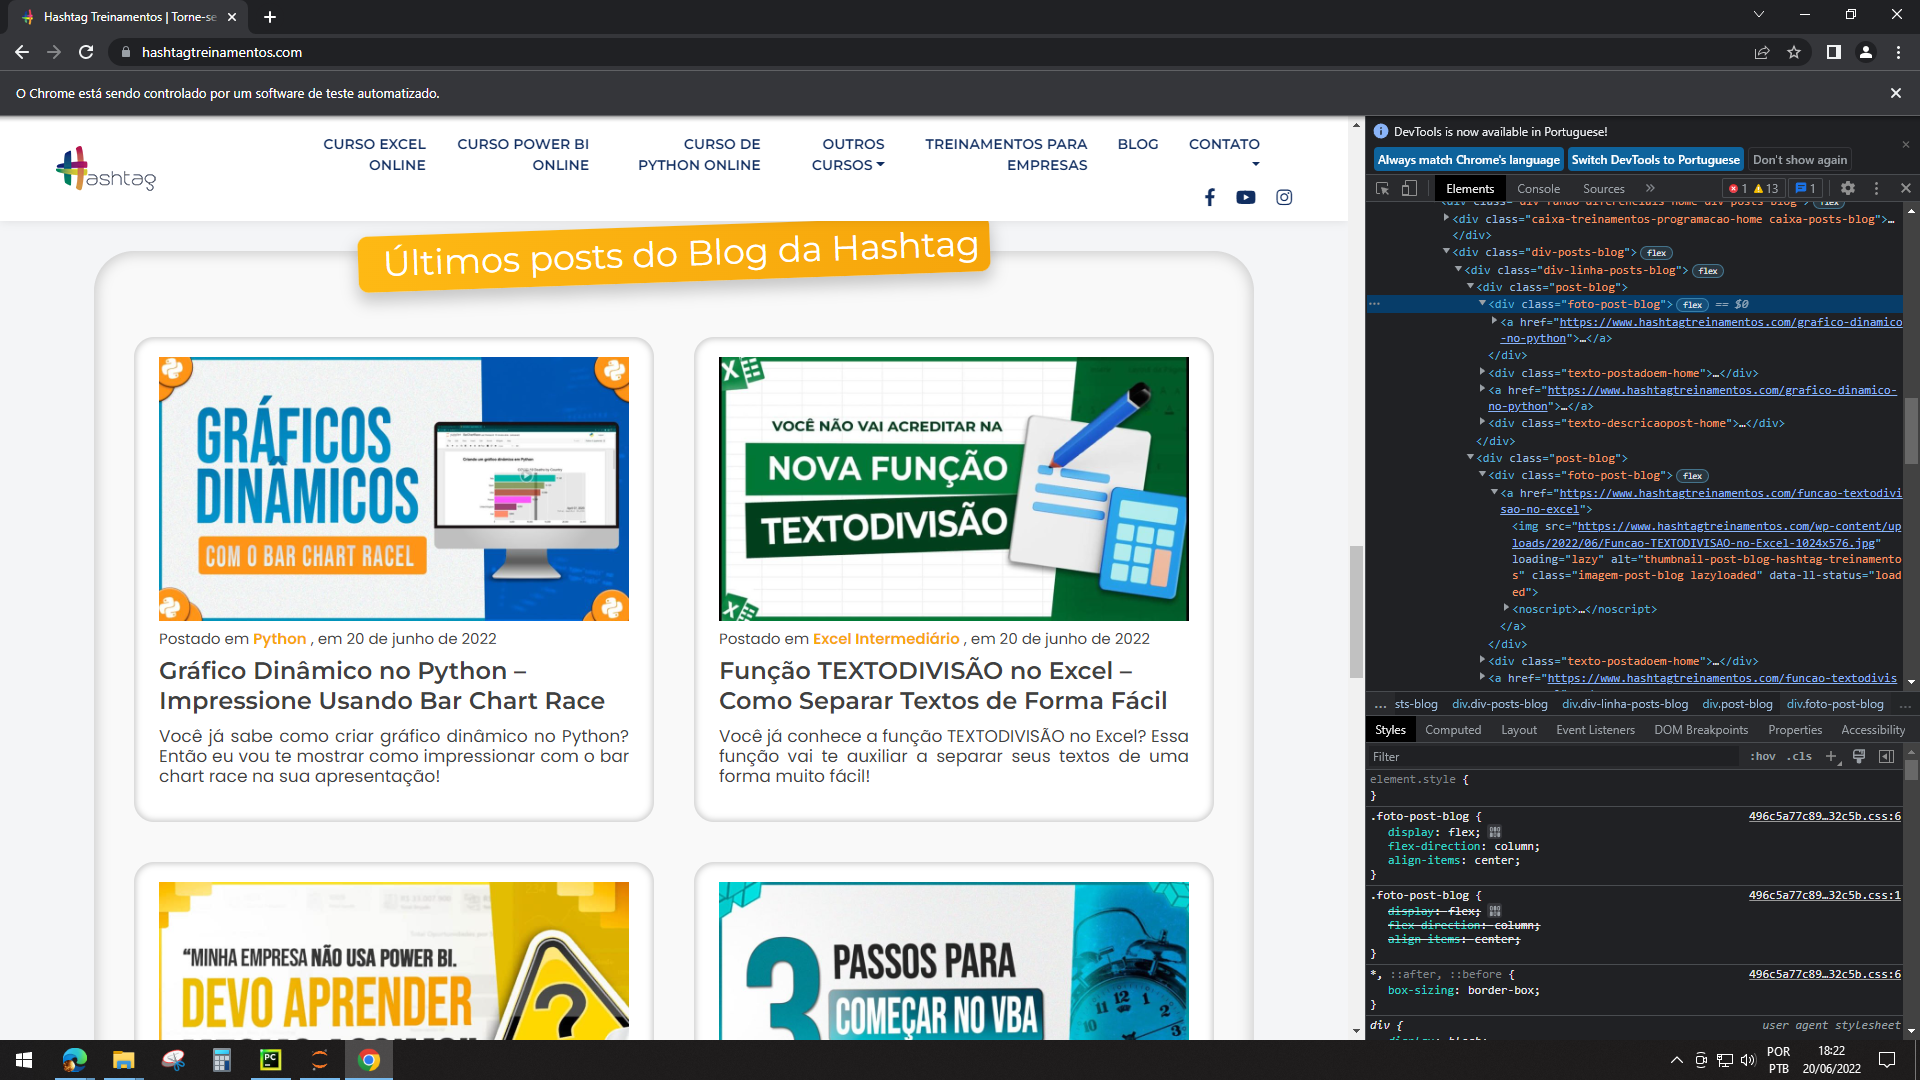

In [60]:
lista_elementos2 = navegador.find_elements(By.CLASS_NAME, 'foto-post-blog')
for elemento in lista_elementos2:
    link = elemento.find_element(By.TAG_NAME, 'a').get_attribute('href')
    print(link)

https://www.hashtagtreinamentos.com/grafico-dinamico-no-python
https://www.hashtagtreinamentos.com/funcao-textodivisao-no-excel
https://www.hashtagtreinamentos.com/empresa-nao-usa-power-bi
https://www.hashtagtreinamentos.com/passos-para-comecar-no-vba
